In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [0]:
df = pd.read_csv('/dbfs/FileStore/shared_uploads/ana.p.rossi.menezes@avanade.com/Tabela_Fake_Produtos_Vendas.csv', encoding = 'latin', sep=';')
df.head()

,Nome,Sobrenome,Genero,Idade,Email,Profissao,Salario,Estado civil,Cidade,Estado,UF,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,Data da transacao,Agrupamento da transacao,Valor da transacao
0,Amy,Rogers,Feminino,27,a.rogers@hotmail.com,Professor,3267,Divorciado,Luisburgo,Minas Gerais,MG,8748,3054,0.65,NAO,NAO,2022-01-30,Esporte e Lazer,978
1,Florrie,Hawkins,Feminino,22,f.hawkins@hotmail.com,Produtor,4551,Casado,Palmeirina,Pernambuco,PE,13607,11181,0.18,NAO,NAO,2022-01-29,Alimentos e Bebidas,550
2,Daisy,Elliott,Feminino,29,d.elliott@hotmail.com,Florista,9698,Viuvo,Ibiara,Paraiba,PB,24537,18978,0.23,NAO,SIM,2022-02-27,Eletrodomesticos,2507
3,Gianna,Campbell,Feminino,27,g.campbell@hotmail.com,Interprete,592,Casado,Colinas,Maranhao,MA,1658,441,0.73,NAO,SIM,2022-02-14,Posto de gasolina,556
4,Victor,Craig,Masculino,27,v.craig@hotmail.com,Mecanico,1782,Viuvo,Malhador,Sergipe,SE,4228,4090,0.03,SIM,SIM,2022-02-04,Alimentos e Bebidas,2404


In [0]:
df['Data da transacao'] = pd.DatetimeIndex(df['Data da transacao'])

df_f = df['Ano-Mes'] = df['Data da transacao'].dt.strftime('%m-%Y')

df_f = df.groupby(['Nome','Sobrenome','Genero','Idade','Estado civil','Cidade','Estado','Profissao','Salario','Limite total','Limite disponivel','Limite utilizado_p','Seguro Auto','Seguro Residencial','Ano-Mes']).agg({'Valor da transacao':'sum'}).reset_index()

df_f = df_f.pivot(index=['Nome','Sobrenome','Genero','Idade','Estado civil','Cidade','Estado','Profissao','Salario','Limite total','Limite disponivel','Limite utilizado_p','Seguro Auto','Seguro Residencial'], columns='Ano-Mes', values='Valor da transacao').fillna(0).reset_index()

df_f.head()

Ano-Mes,Nome,Sobrenome,Genero,Idade,Estado civil,Cidade,Estado,Profissao,Salario,Limite total,...,03-2023,04-2022,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022
0,Abigail,Brooks,Feminino,29,Viuvo,Lambari,Minas Gerais,Medico,7411,19986,...,5120.0,3121.0,0.0,0.0,5348.0,0.0,3802.0,6980.0,4037.0,0.0
1,Abigail,Cameron,Feminino,69,Divorciado,Salto da Divisa,Minas Gerais,Professor,825,1419,...,358.0,570.0,0.0,171.0,208.0,285.0,483.0,0.0,0.0,1014.0
2,Abigail,Carroll,Feminino,87,Viuvo,Sao Jose de Piranhas,Paraiba,Cientista,5471,10368,...,0.0,0.0,0.0,0.0,1273.0,0.0,0.0,0.0,0.0,7474.0
3,Abigail,Clark,Feminino,22,Divorciado,Matutina,Minas Gerais,Assistente social,7026,17597,...,4411.0,4962.0,8205.0,5482.0,1269.0,0.0,0.0,2833.0,3645.0,10017.0
4,Abigail,Douglas,Feminino,22,Divorciado,Barbosa Ferraz,Parana,Compositor,5222,12544,...,0.0,3609.0,2306.0,0.0,1391.0,0.0,1443.0,0.0,0.0,0.0


In [0]:
input_01 = []
input_02 = []
input_03 = []
input_04 = []
input_05 = []
input_06 = []
output_real = []

for indice, linha in df_f.iterrows():
    #1º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de fev/22 com relação a jan/22
    if linha['02-2022'] > linha['01-2022']:
        input_01.append(1)
    else:
        input_01.append(0)
    #2º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de mar/22 com relação a fev/22
    if linha['03-2022'] > linha['02-2022']:
        input_02.append(1)
    else:
        input_02.append(0)
    #3º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de abr/22 com relação a mar/22
    if linha['04-2022'] > linha['03-2022']:
        input_03.append(1)
    else:
        input_03.append(0)
    #4º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de mai/22 com relação a abr/22
    if linha['05-2022'] > linha['04-2022']:
        input_04.append(1)
    else:
        input_04.append(0)
    #5º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de jun/22 com relação a mai/22
    if linha['06-2022'] > linha['05-2022']:
        input_05.append(1)
    else:
        input_05.append(0)
    #6º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de jul/22 com relação a jun/22
    if linha['07-2022'] > linha['06-2022']:
        input_06.append(1)
    else:
        input_06.append(0)
    #indicador que será utilizado como comparador
    if linha['08-2022'] > linha['07-2022']:
        output_real.append(1)
    else:
        output_real.append(0)
#saída do 1º input
df_f['Input_01'] = input_01
#saída do 2º input
df_f['Input_02'] = input_02
#saída do 3º input
df_f['Input_03'] = input_03
#saída do 4º input
df_f['Input_04'] = input_04
#saída do 5º input
df_f['Input_05'] = input_05
#saída do 6º input
df_f['Input_06'] = input_06
#1º neuronio
#definição do 1º peso inicial
df_f['N1_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N1_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N1_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N1_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N1_Weight_05'] = 0.0
#definição do 6º peso inicial
df_f['N1_Weight_06'] = 0.0
#definição do bias
N1_Bias = 0.0
#2º neuronio
#definição do 1º peso inicial
df_f['N2_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N2_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N2_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N2_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N2_Weight_05'] = 0.0
#definição do 6º peso inicial
df_f['N2_Weight_06'] = 0.0
#definição do bias
N2_Bias = 0.1
#3º neuronio
#definição do 1º peso inicial
df_f['N3_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N3_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N3_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N3_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N3_Weight_05'] = 0.0
#definição do 6º peso inicial
df_f['N3_Weight_06'] = 0.0
#definição do bias
N3_Bias = 0.2
#4º neuronio
#definição do 1º peso inicial
df_f['N4_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N4_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N4_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N4_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N4_Weight_05'] = 0.0
#definição do 6º peso inicial
df_f['N4_Weight_06'] = 0.0
#definição do bias
N4_Bias = 0.3
#saída do resultado real analisado com base no histórico
df_f['Output_Real'] = output_real
#resultado do qual será analisado
df_f['Resultado_Final'] = 0

#traz uma amostra dos dados inseridos
df_f.head()


Ano-Mes,Nome,Sobrenome,Genero,Idade,Estado civil,Cidade,Estado,Profissao,Salario,Limite total,...,N3_Weight_05,N3_Weight_06,N4_Weight_01,N4_Weight_02,N4_Weight_03,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final
0,Abigail,Brooks,Feminino,29,Viuvo,Lambari,Minas Gerais,Medico,7411,19986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,Abigail,Cameron,Feminino,69,Divorciado,Salto da Divisa,Minas Gerais,Professor,825,1419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,Abigail,Carroll,Feminino,87,Viuvo,Sao Jose de Piranhas,Paraiba,Cientista,5471,10368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Abigail,Clark,Feminino,22,Divorciado,Matutina,Minas Gerais,Assistente social,7026,17597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Abigail,Douglas,Feminino,22,Divorciado,Barbosa Ferraz,Parana,Compositor,5222,12544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [0]:
#Faz uma cópia e não um ponteiro para a tabela a ser minerada
df_f2 = df_f.copy()

#define a quantidade máxima de épocas para o cálculo do peso, caso contrário, será abortado
qtd_epocas_max = 10

#define a limiar de ativação
limiar_ativacao = 0.5

#define a variável de seleção final
retorno_resultado = 0

#função de ativação
#binária
def ativacao(pesado_soma):
    if pesado_soma >= limiar_ativacao:
        return 1
    else:
        return 0

#sigmóide - não utilizado
'''def ativacao(pesado_soma):
    return 1 / (1 + np.exp(-pesado_soma))'''
#função de ativação

#função de incremento da taxa de aprendizagem
taxa_de_aprendizagem = 0.1

def atualizacao_peso(peso_atual,entrada,erro):
    peso_novo = 0
    peso_novo = peso_atual + (taxa_de_aprendizagem*entrada*erro)
    return peso_novo
    
#função de incremento da taxa de aprendizagem

#função que calcula o erro
def atualizacao_erro(output_real, output_calculado):
    erro_novo = 0.0
    erro_novo = abs(output_real - output_calculado)
    return erro_novo
#função que calcula o erro

#função de multiplicação dos pesos
def perceptron(entrada,output_real,peso,bias):
    #definição do erro
    erro = 0.0
    
    #definição do produto entre a entrada e o peso
    pesado_soma = 0
    
    #variável de contagem das tentativas
    i = 0
    
    #se o valor ainda não trouxe o próximo do real e se o valor também for igual a 0, daí seguirmos com o cálculo
    while ativacao(pesado_soma)!=output_real and i < qtd_epocas_max:
        #faz a contagem de tentativas
        i = i + 1
        
        for x,w in zip(entrada,peso):
            #faz o cálculo do peso até ser o suficiente
            pesado_soma += (x*w)
            #faz o cálculo do peso até ser o suficiente
        
        #faz a inclusão do bias no cálculo do produto da soma
        pesado_soma = (pesado_soma + bias)
        #faz a inclusão do bias no cálculo do produto da soma
        
        #realiza as atualizações do erro e peso em caso de não existir validação realizada
        if ativacao(pesado_soma)!=output_real:
            #faz o cálculo do erro até ser o suficiente
            erro = atualizacao_erro(output_real,ativacao(pesado_soma))
            #faz o cálculo do erro até ser o suficiente
            
            for index,(x,w) in enumerate(zip(entrada,peso)):
                #Atualiza o novo peso dos indicadores
                peso[index] = atualizacao_peso(w,x,erro)
                #Atualiza o novo peso dos indicadores

                #faço a limpeza do produto da soma para a próxima avaliação
                pesado_soma = 0
        
    return ativacao(pesado_soma),peso #retorna o resultado da ativação e o seu respectivo peso
#função de multiplicação dos pesos

acuracia = []

def analisaNeuronio(col_peso_01,col_peso_02,col_peso_03,col_peso_04,col_peso_05,col_peso_06,bias,resultado):
    #percorrer a lista e adiciona os input's e pesos
    ret_perceptron = []
    res_analise = []
    res_peso_total = []
    res_peso_01 = []
    res_peso_02 = []
    res_peso_03 = []
    res_peso_04 = []
    res_peso_05 = []
    res_peso_06 = []

    #faço o 1º neurônio realizar sua análise
    for indice, linha in df_f2.iterrows():
        #resultado real analisado com base no histórico
        res_real = [linha['Output_Real']]
        #entradas padrão
        x_entrada = [linha['Input_01'],linha['Input_02'],linha['Input_03'],linha['Input_04'],linha['Input_05'],linha['Input_06']]
        #pesos do 1º neurônio
        w_peso = [linha[col_peso_01],linha[col_peso_02],linha[col_peso_03],linha[col_peso_04],linha[col_peso_05],linha[col_peso_06]]

        #saida dos resultados
        ret_perceptron.append(perceptron(x_entrada,linha['Output_Real'],w_peso,bias))
        res_analise.append(ret_perceptron[indice][0])
        res_peso_total.append(ret_perceptron[indice][1])
        res_peso_01.append(res_peso_total[indice][0])
        res_peso_02.append(res_peso_total[indice][1])
        res_peso_03.append(res_peso_total[indice][2])
        res_peso_04.append(res_peso_total[indice][3])
        res_peso_05.append(res_peso_total[indice][4])
        res_peso_06.append(res_peso_total[indice][5])
    df_f2[resultado] = res_analise
    df_f2[col_peso_01] = res_peso_01
    df_f2[col_peso_02] = res_peso_02
    df_f2[col_peso_03] = res_peso_03
    df_f2[col_peso_04] = res_peso_04
    df_f2[col_peso_05] = res_peso_05
    df_f2[col_peso_06] = res_peso_06
    #preenche com o indicador de acurácia que será o utilizado para definir qual o melhor neurônio a ser utilizado no final
    acuracia.append(accuracy_score(df_f2['Output_Real'], df_f2[resultado]))
    #traz a o resultado do neurônio que tem maior acurácia
    if acuracia[len(acuracia)-1] >= acuracia[len(acuracia)-2]:
        df_f2['Resultado_Final'] = res_analise
    else:
        df_f2['Resultado_Final'] = res_analise
    
#processa o 1º neurônio
analisaNeuronio('N1_Weight_01','N1_Weight_02','N1_Weight_03','N1_Weight_04','N1_Weight_05','N1_Weight_06',N1_Bias,'N1_Resultado')
#processa o 2º neurônio
analisaNeuronio('N2_Weight_01','N2_Weight_02','N2_Weight_03','N2_Weight_04','N2_Weight_05','N2_Weight_06',N2_Bias,'N2_Resultado')
#processa o 3º neurônio
analisaNeuronio('N3_Weight_01','N3_Weight_02','N3_Weight_03','N3_Weight_04','N3_Weight_05','N3_Weight_06',N3_Bias,'N3_Resultado')
#processa o 4º neurônio
analisaNeuronio('N4_Weight_01','N4_Weight_02','N4_Weight_03','N4_Weight_04','N4_Weight_05','N4_Weight_06',N4_Bias,'N4_Resultado')

#traz uma amostra dos resultados
df_f2.head()

Ano-Mes,Nome,Sobrenome,Genero,Idade,Estado civil,Cidade,Estado,Profissao,Salario,Limite total,...,N4_Weight_03,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final,N1_Resultado,N2_Resultado,N3_Resultado,N4_Resultado
0,Abigail,Brooks,Feminino,29,Viuvo,Lambari,Minas Gerais,Medico,7411,19986,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,Abigail,Cameron,Feminino,69,Divorciado,Salto da Divisa,Minas Gerais,Professor,825,1419,...,0.1,0.0,0.1,0.1,1,1,1,1,1,1
2,Abigail,Carroll,Feminino,87,Viuvo,Sao Jose de Piranhas,Paraiba,Cientista,5471,10368,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,Abigail,Clark,Feminino,22,Divorciado,Matutina,Minas Gerais,Assistente social,7026,17597,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,Abigail,Douglas,Feminino,22,Divorciado,Barbosa Ferraz,Parana,Compositor,5222,12544,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [0]:
#apresenta novos dados ao modelo para entender se ele vai ser eficaz na propagação e compactuar com os devidos padrões sinalizados
output_extra = []
for indice, linha in df_f2.iterrows():
    if linha['03-2023'] > linha['02-2023']:
        output_extra.append(1)
    else:
        output_extra.append(0)

#saída do output_extra
df_f2['Output_Extra'] = output_extra

#traz uma amostra das informações inseridas
df_f2.head()

Ano-Mes,Nome,Sobrenome,Genero,Idade,Estado civil,Cidade,Estado,Profissao,Salario,Limite total,...,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final,N1_Resultado,N2_Resultado,N3_Resultado,N4_Resultado,Output_Extra
0,Abigail,Brooks,Feminino,29,Viuvo,Lambari,Minas Gerais,Medico,7411,19986,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,Abigail,Cameron,Feminino,69,Divorciado,Salto da Divisa,Minas Gerais,Professor,825,1419,...,0.0,0.1,0.1,1,1,1,1,1,1,1
2,Abigail,Carroll,Feminino,87,Viuvo,Sao Jose de Piranhas,Paraiba,Cientista,5471,10368,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,Abigail,Clark,Feminino,22,Divorciado,Matutina,Minas Gerais,Assistente social,7026,17597,...,0.0,0.0,0.0,0,0,0,0,0,0,1
4,Abigail,Douglas,Feminino,22,Divorciado,Barbosa Ferraz,Parana,Compositor,5222,12544,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [0]:
#matriz de confusão
print('Matrizes de confusão:')
print('Resultado final ',pd.crosstab(df_f2['Output_Real'],df_f2['Resultado_Final'], rownames=['Real'], colnames=['Predito'], margins=True))
print('----------------------------------')
print('Resultado novo ',pd.crosstab(df_f2['Resultado_Final'],df_f2['Output_Extra'], rownames=['Real'], colnames=['Predito'], margins=True))
print('----------------------------------')
#acurácia = é a média global do acerto do modelo após a classificação
print('Acurácias:')
print('Resultado final ',accuracy_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ',accuracy_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')
#precisão = é a informação de quantas observações o modelo classificou de maneira correta
print('Precisões:')
print('Resultado final ', precision_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ', precision_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')
#recall = analisa na base quantos realmente o modelo conseguiu prever com aumento no mês seguinte de utilização
print('Recalls:')
print('Resultado final ', recall_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ', recall_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')

Matrizes de confusão:
Resultado final  Predito     0     1   All
Real                     
0        2513     0  2513
1           1  1686  1687
All      2514  1686  4200
----------------------------------
Resultado novo  Predito     0     1   All
Real                     
0        1558   956  2514
1         527  1159  1686
All      2085  2115  4200
----------------------------------
Acurácias:
Resultado final  0.9997619047619047
----------------------------------
Resultado novo  0.6469047619047619
----------------------------------
Precisões:
Resultado final  1.0
----------------------------------
Resultado novo  0.5479905437352246
----------------------------------
Recalls:
Resultado final  0.999407231772377
----------------------------------
Resultado novo  0.6874258600237247
----------------------------------


In [0]:
#Insere um indicador que será utilizado a seguir
status = []
for indice, linha in df_f2.iterrows():
    if linha['Resultado_Final'] == linha['Output_Extra']:
        status.append('ACERTO')
    else:
        status.append('ERRO')
df_analise = df_f2
df_analise['status'] = status
df_analise.head()
#Insere um indicador que será utilizado a seguir

Ano-Mes,Nome,Sobrenome,Genero,Idade,Estado civil,Cidade,Estado,Profissao,Salario,Limite total,...,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final,N1_Resultado,N2_Resultado,N3_Resultado,N4_Resultado,Output_Extra,status
0,Abigail,Brooks,Feminino,29,Viuvo,Lambari,Minas Gerais,Medico,7411,19986,...,0.0,0.0,0,0,0,0,0,0,1,ERRO
1,Abigail,Cameron,Feminino,69,Divorciado,Salto da Divisa,Minas Gerais,Professor,825,1419,...,0.1,0.1,1,1,1,1,1,1,1,ACERTO
2,Abigail,Carroll,Feminino,87,Viuvo,Sao Jose de Piranhas,Paraiba,Cientista,5471,10368,...,0.0,0.0,0,0,0,0,0,0,0,ACERTO
3,Abigail,Clark,Feminino,22,Divorciado,Matutina,Minas Gerais,Assistente social,7026,17597,...,0.0,0.0,0,0,0,0,0,0,1,ERRO
4,Abigail,Douglas,Feminino,22,Divorciado,Barbosa Ferraz,Parana,Compositor,5222,12544,...,0.0,0.0,0,0,0,0,0,0,0,ACERTO


Out[9]: <AxesSubplot:xlabel='Ano-Mes', ylabel='Ano-Mes'>

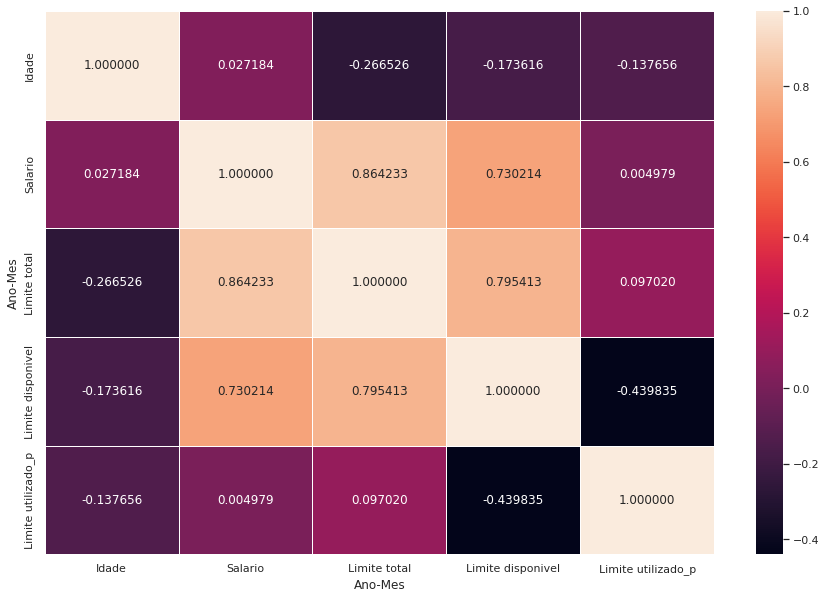

In [0]:
#análise de correlação sobre o acerto do modelo
df_analise2 = df_analise[df_analise['status']=='ACERTO']
correlacoes = df_analise2[['Idade','Salario','Limite total','Limite disponivel','Limite utilizado_p']].corr()

sns.set_theme()

#desenha um mapa de calor com os valores números em cada célula
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlacoes, annot=True, fmt="f", linewidths=.5, ax=ax)
#análise de correlação sobre o acerto do modelo

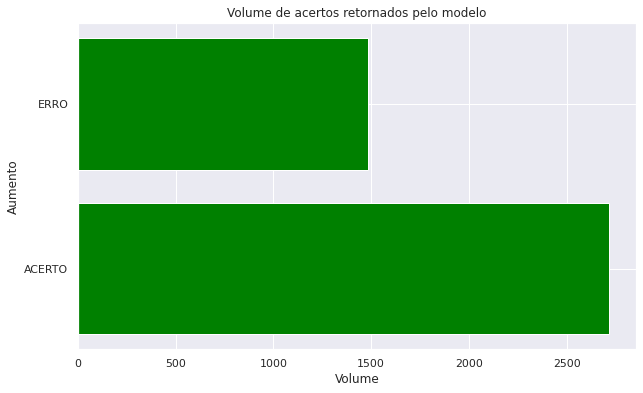

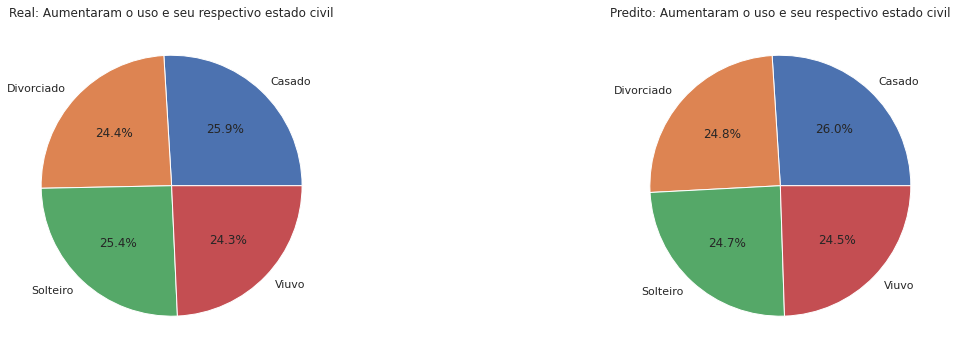

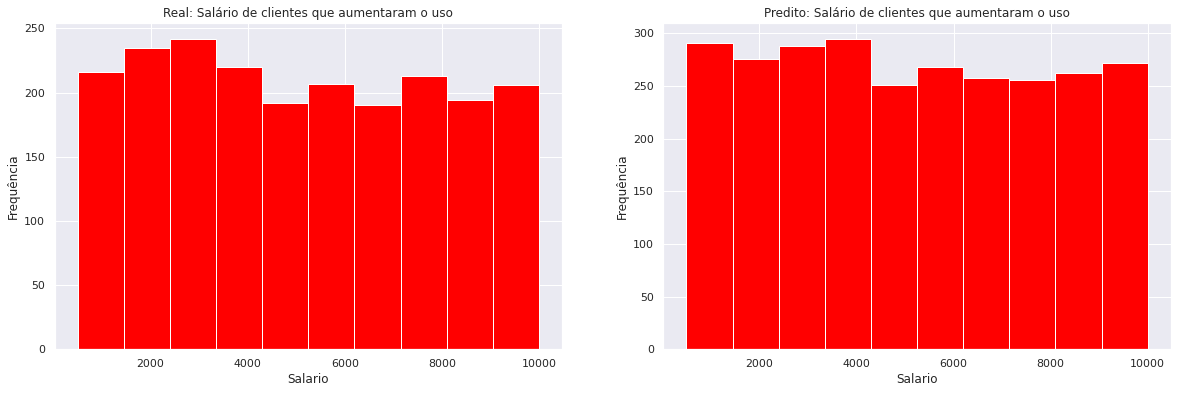

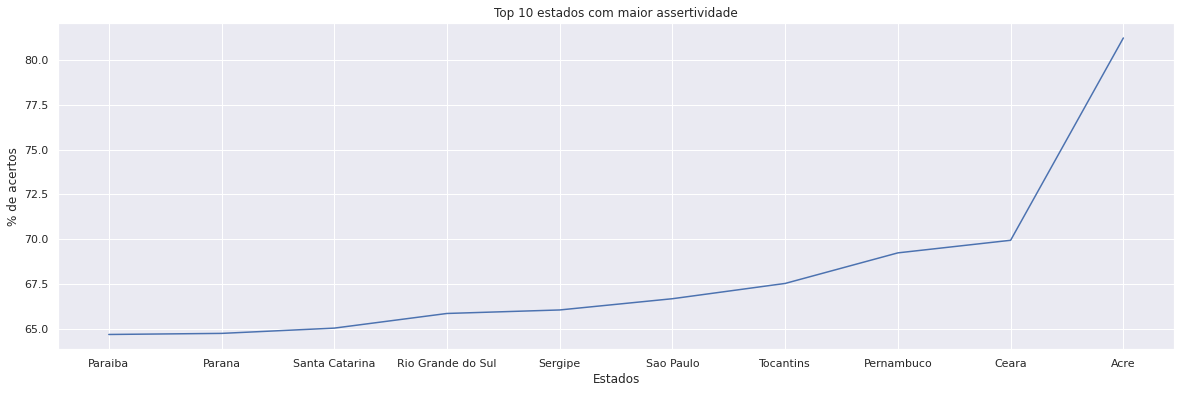

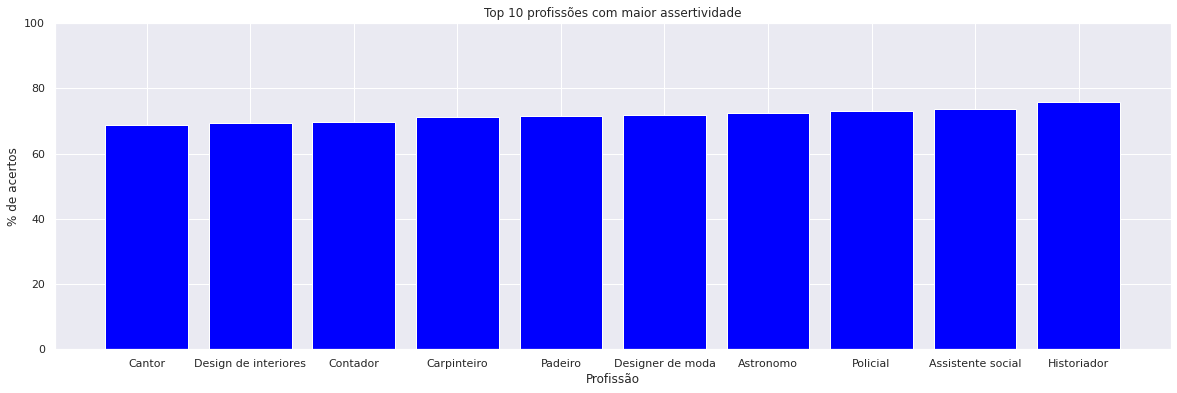

In [0]:
################### Volume de acertos ###################
plt.figure(figsize = (10,6))

df_analise2 = df_analise.groupby(['status']).agg({'Nome':'count'}).reset_index()

plt.barh(df_analise2['status'],df_analise2['Nome'],color='green')
#define titulo
plt.title('Volume de acertos retornados pelo modelo')
#define nome a mostrar no eixo x
plt.xlabel('Volume')
#define nome a mostrar no eixo y
plt.ylabel('Aumento')
plt.show()
################### Volume de acertos ###################

################### Estado civil ###################
plt.figure(figsize = (20,6))

df_analise2 = df_analise.groupby(['Estado civil','status']).agg({'Nome':'count'}).reset_index()
df_analise2 = df_analise2.pivot(index=['Estado civil'], columns='status', values='Nome').fillna(0).reset_index()

#subplot
plt.subplot(1, 2, 1)
data = df_analise2['ACERTO']
plt.pie(data, labels = df_analise2['Estado civil'] , autopct='%1.1f%%')
plt.title('Real: Aumentaram o uso e seu respectivo estado civil')

df_analise2 = df_analise.groupby(['Estado civil','Output_Extra']).agg({'Nome':'count'}).reset_index()
df_analise2 = df_analise2.pivot(index=['Estado civil'], columns='Output_Extra', values='Nome').fillna(0).reset_index()

#subplot
plt.subplot(1, 2, 2)
data = df_analise2[1]
plt.pie(data, labels = df_analise2['Estado civil'] , autopct='%1.1f%%')
plt.title('Predito: Aumentaram o uso e seu respectivo estado civil')
plt.show()
################### Estado civil ###################


################### Salário ###################
plt.figure(figsize = (20,6))

df_analise2 = df_analise[df_analise['Output_Extra'] == 1]

#subplot
plt.subplot(1, 2, 1)
#define X e o histograma
plt.hist(df_analise2['Salario'], color = 'red')
#define título
plt.title('Real: Salário de clientes que aumentaram o uso')
#define nome a mostrar no eixo x
plt.xlabel('Salario')
#define nome a mostrar no eixo y
plt.ylabel('Frequência')

df_analise2 = df_analise[df_analise['status'] == 'ACERTO']

#subplot
plt.subplot(1, 2, 2)
#define X e o histograma
dados = df_analise2['Salario']
plt.hist(dados, color = 'red')
#define título
plt.title('Predito: Salário de clientes que aumentaram o uso')
#define nome a mostrar no eixo x
plt.xlabel('Salario')
#define nome a mostrar no eixo y
plt.ylabel('Frequência')

plt.show()
################### Salário ###################

################### Top 10 estados de maior assertividade ###################
df_analise2 = df_analise.groupby(['Estado','status']).agg({'Nome':'count'}).reset_index()
df_analise2 = df_analise2.pivot(index=['Estado'], columns='status', values='Nome').fillna(0).reset_index()
total = []
perc_acertos = []
for indice, linha in df_analise2.iterrows():
    calc_total = (linha['ACERTO']+linha['ERRO'])
    calc_acertos = linha['ACERTO']/(linha['ACERTO']+linha['ERRO'])*100
    total.append(calc_total)
    perc_acertos.append(calc_acertos)
df_analise2['total'] = total
df_analise2['perc_acertos'] = perc_acertos
df_analise2 = df_analise2.nlargest(10, 'perc_acertos') #Pega primeiro o top 10 dos maiores acertos
df_analise2 = df_analise2.nsmallest(10, 'perc_acertos') #Agora organiza pelos menores para ficar mais interessante no gráfico

plt.figure(figsize = (20,6))

x = df_analise2['Estado']
y = df_analise2['perc_acertos']
plt.plot(x,y)
plt.title('Top 10 estados com maior assertividade')
plt.xlabel('Estados')
plt.ylabel('% de acertos')
plt.show()
################### Top 10 estados de maior assertividade ###################

################### Top 10 profissões de maior assertividade ###################
df_analise2 = df_analise.groupby(['Profissao','status']).agg({'Nome':'count'}).reset_index()
df_analise2 = df_analise2.pivot(index=['Profissao'], columns='status', values='Nome').fillna(0).reset_index()
total = []
perc_acertos = []
for indice, linha in df_analise2.iterrows():
    calc_total = (linha['ACERTO']+linha['ERRO'])
    calc_acertos = linha['ACERTO']/(linha['ACERTO']+linha['ERRO'])*100
    total.append(calc_total)
    perc_acertos.append(calc_acertos)
df_analise2['total'] = total
df_analise2['perc_acertos'] = perc_acertos
df_analise2 = df_analise2.nlargest(10, 'perc_acertos') #Pega primeiro o top 10 dos maiores acertos
df_analise2 = df_analise2.nsmallest(10, 'perc_acertos') #Agora organiza pelos menores para ficar mais interessante no gráfico

plt.figure(figsize = (20,6))

x = df_analise2['Profissao']
y = df_analise2['perc_acertos']
plt.bar(x,y, color='blue')
plt.axis(ymin=0,ymax=100)
plt.title('Top 10 profissões com maior assertividade')
plt.xlabel('Profissão')
plt.ylabel('% de acertos')
plt.show()
################### Top 10 profissões de maior assertividade ###################

Tamanho da amostra que precisamos:  365


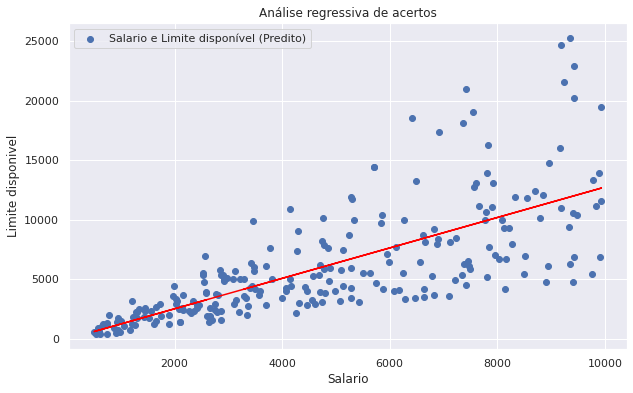

In [0]:
#definição do tamanho da população mínima para análise dos Input's (Amostragem simples randomizada)
def tamanhoAmostra(e,N):
    n = (N / (1 + (N*(e**2))))
    return (n)
e_ = 0.05 #Erro amostral de 5%
N_ = len(df_analise.index)
qtd_amostra = int(tamanhoAmostra(e_, N_))
print('Tamanho da amostra que precisamos: ',qtd_amostra)

df_amostra = df_analise.sample(qtd_amostra)

df_amostra.head()
#definição do tamanho da população mínima para análise dos Input's (Amostragem simples randomizada)

#com base na idade e salário faço o gráfico de regressão linear
plt.figure(figsize = (10,6))
plt.title('Análise regressiva de acertos')

df_amostra2 = df_amostra[df_amostra['status'] == 'ACERTO']
x = df_amostra2['Salario']
y = df_amostra2['Limite disponivel']

plt.scatter(x,y,label='Salario e Limite disponível (Predito)')
plt.xlabel('Salario')
plt.ylabel('Limite disponivel')
plt.legend()

#faço o cálculo de regressão linear
modelo = LinearRegression()
modelo.fit(x.values.reshape(-1,1),y)

#calcula o coeficiente linear e coeficiente angular da variável 'y'
#modelo.coef_ = coeficiente angular
#modelo.intercept_ = coeficiente linear
x = np.array(x.values)
y = (modelo.intercept_ + x) * modelo.coef_
plt.plot(x,y,color='red')

plt.show()